In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [11]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = "./data/train"
data_dir = pathlib.Path(data_dir)

In [12]:
print(data_dir)

data\train


data\train\Acne and Rosacea Photos\07Acne081101.jpg


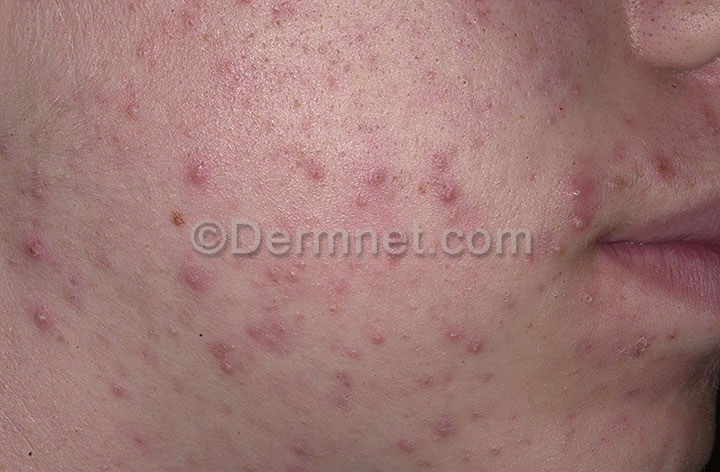

In [13]:
acne = list(data_dir.glob('Acne and Rosacea Photos/*'))
print(acne[0])
PIL.Image.open(str(acne[0]))

In [14]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


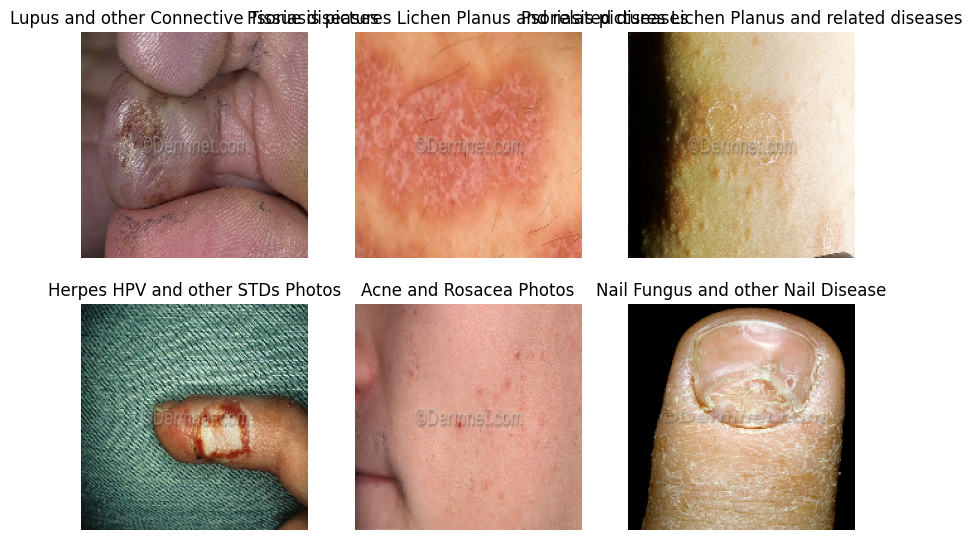

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [52]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(23, activation='softmax'))


In [53]:
resnet_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 23)             │        23,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,709,463 (98.07 MB)

 Trainable params: 2,121,751 (8.09 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [54]:
# resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# For one-hot encoded labels
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [55]:
epochs=15
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 373s 950ms/step - accuracy: 0.2420 - loss: 2.7770 - val_accuracy: 0.3163 - val_loss: 2.3117
Epoch 2/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 198s 508ms/step - accuracy: 0.3670 - loss: 2.0920 - val_accuracy: 0.3539 - val_loss: 2.2009
Epoch 3/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 197s 508ms/step - accuracy: 0.4388 - loss: 1.8253 - val_accuracy: 0.3597 - val_loss: 2.2061
Epoch 4/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 199s 510ms/step - accuracy: 0.5206 - loss: 1.5794 - val_accuracy: 0.3613 - val_loss: 2.2575
Epoch 5/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 197s 508ms/step - accuracy: 0.5794 - loss: 1.3556 - val_accuracy: 0.3806 - val_loss: 2.2394
Epoch 6/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 198s 509ms/step - accuracy: 0.6481 - loss: 1.1220 - val_accuracy: 0.3880 - val_loss: 2.2394
Epoch 7/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 197s 507ms/step - accuracy: 0.7114 - loss: 0.9229 - val_accuracy: 0.3928 - val_loss: 2.3837
Epoch 8/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 197s 506ms/step - accuracy: 0.7657 -

# Evaluating The Model

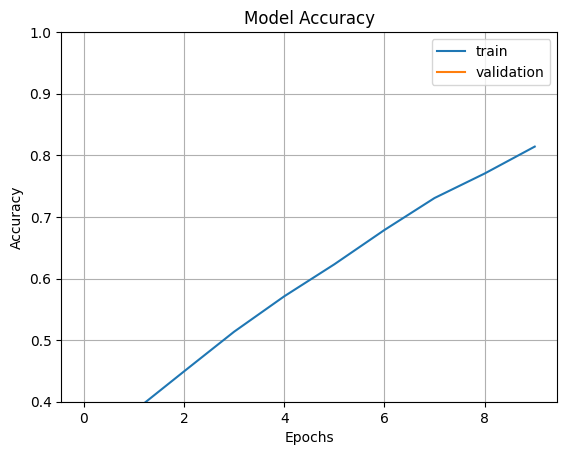

In [48]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

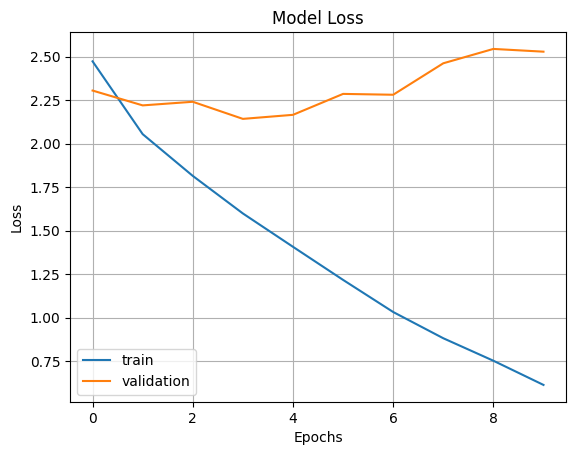

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [56]:
resnet_model.evaluate(train_ds)

389/389 ━━━━━━━━━━━━━━━━━━━━ 174s 448ms/step - accuracy: 0.7946 - loss: 0.6306


[0.5906245708465576, 0.8107022047042847]

In [58]:
resnet_model.save("./model/face_model_V2.keras")

# Making Predictions

In [ ]:
# import cv2
# image=cv2.imread(str(roses[0]))
# image_resized= cv2.resize(image, (img_height,img_width))
# image=np.expand_dims(image_resized,axis=0)
# print(image.shape)


(1, 180, 180, 3)


In [45]:
# pred=resnet_model.predict(image)
# print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
# output_class=class_names[np.argmax(pred)]
# print("The predicted class is", output_class)

The predicted class is roses
